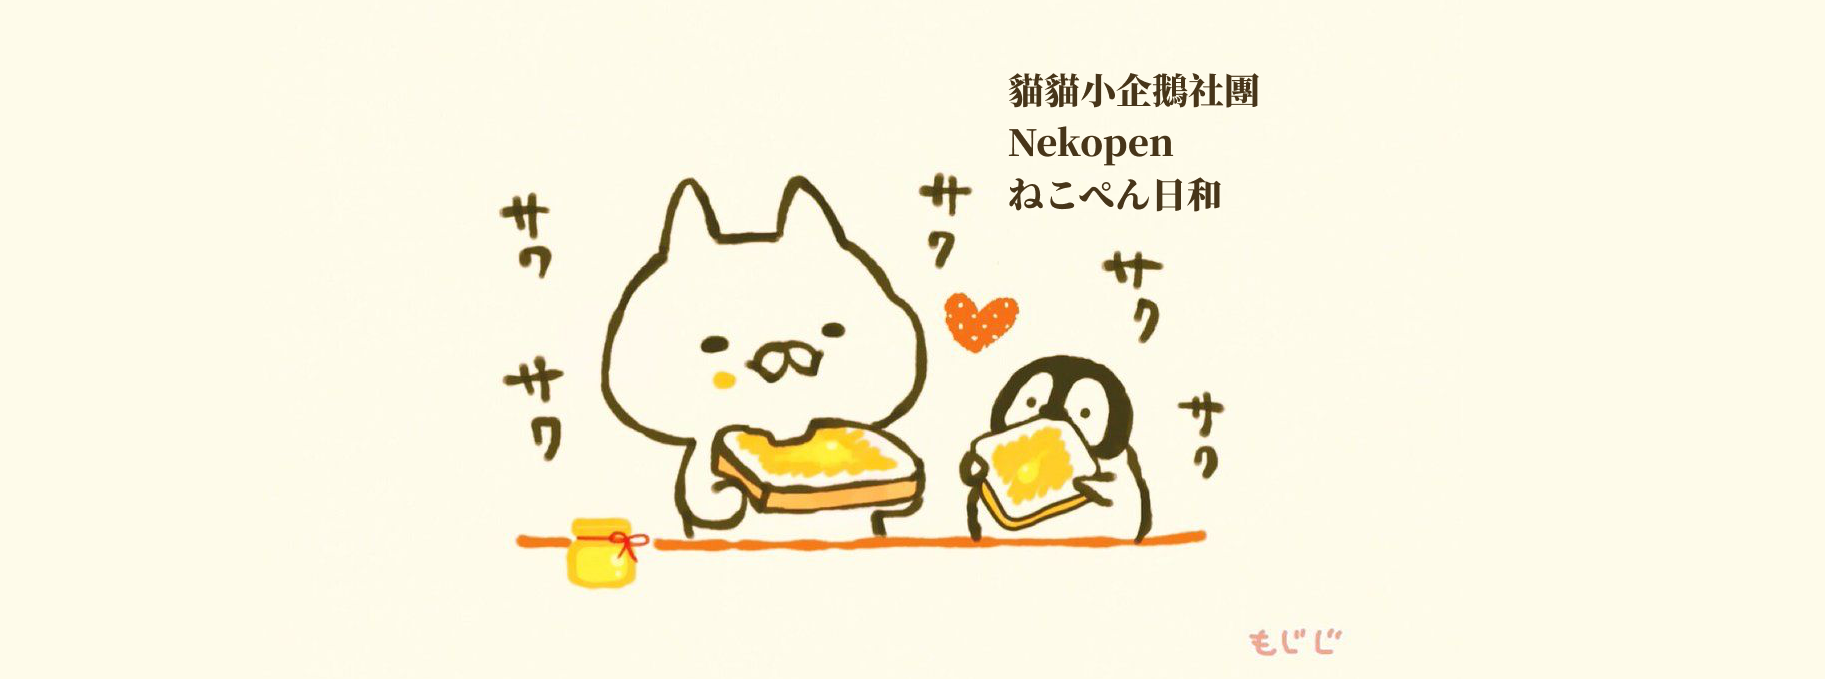

## 1. Get the file name

In [19]:
import os
import pandas as pd
import numpy as np


# Directory where the Excel files are stored
SET_path = r"C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\1_Input\01_SET_Data\01_SET.csv"
directory =  r"C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\1_Input\01_Raw_Stock_Data"
target_directory = r"C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\01_Stock3YRollingData"

def list_and_sort_xlsx_files(directory):
    xlsx_files = []
    
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".xlsx"):
            # Try to split the filename and check if the first part is numeric
            try:
                # If the first part (before underscore) is not a valid integer, skip it
                int(filename.split('_')[0])  
                xlsx_files.append(filename)
            except ValueError:
                print(f"Skipping invalid file: {filename}")
                continue  # Skip files that do not start with a valid number
    
    # Sort the valid files by the numeric part before the underscore
    sorted_files = sorted(xlsx_files, key=lambda x: int(x.split('_')[0]))
    
    return sorted_files

## 1.1 Set  up Market Data

In [11]:
#Mange The Market Data 
market = pd.read_csv(SET_path)
market["Date"] = pd.to_datetime(market["Date"], format='%d/%m/%Y').dt.date
market.set_index("Date", inplace=True)
market.sort_index(ascending=True, inplace=True)
market['Close'] = market['Close'].str.replace(',', '') # transform , to blank
market['Close'] = pd.to_numeric(market.Close)
market['Close'] = market['Close'].round(2)
t_market = market[["Name","Close","%Chg.","%Chg_Float"]]
t_market.columns = ["Name", "Close","%Chg","TRI"]
t_market["log_return"] = np.log(1+t_market["TRI"]).round(5)
t_market["volatility"] = t_market["log_return"].rolling(window=120, min_periods=120).std()
t_market["volatility"] = t_market["volatility"].round(5)

#3_day log define
t_market['3day_log_return'] = t_market['log_return'].rolling(window=3).sum()
t_market['3day_log_return'] = t_market['3day_log_return'].round(5)

t_market

C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\1856956700.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_market["log_return"] = np.log(1+t_market["TRI"]).round(5)


,Name,Close,%Chg,TRI,log_return,volatility,3day_log_return
Date,,,,,,,
2008-01-02,SET,3482.59,-1.76,-0.0176,-0.01776,NaN,NaN
2008-01-03,SET,3440.36,-1.21,-0.0121,-0.01217,NaN,NaN
2008-01-04,SET,3395.28,-1.31,-0.0131,-0.01319,NaN,-0.04312
2008-01-07,SET,3341.74,-1.58,-0.0158,-0.01593,NaN,-0.04129
2008-01-08,SET,3355.70,0.42,0.0042,0.00419,NaN,-0.02493
...,...,...,...,...,...,...,...
2024-09-16,SET,10755.89,0.78,0.0078,0.00777,0.00749,0.01446
2024-09-17,SET,10763.91,0.07,0.0007,0.00070,0.00749,0.01057
2024-09-18,SET,10758.32,-0.05,-0.0005,-0.00050,0.00748,0.00797


In [3]:
# Check the file in sorted_File
# Get and print the sorted list of .xlsx files
sorted_xlsx_files = list_and_sort_xlsx_files(directory)

for file in sorted_xlsx_files:
    print(file)

1_AAV.xlsx
2_ACE.xlsx
4_ADVANC.xlsx
5_AEONTS.xlsx
6_AJ.xlsx
7_AMATA.xlsx
8_ANAN.xlsx
9_AOT.xlsx
10_AP.xlsx
12_ASP.xlsx
13_AURA.xlsx
14_AWC.xlsx
15_BA.xlsx
16_BAM.xlsx
17_BANPU.xlsx
18_BAY.xlsx
19_BBL.xlsx
20_BCH.xlsx
21_BCP.xlsx
22_BCPG.xlsx
23_BDMS.xlsx
24_BEAUTY.xlsx
25_BEC.xlsx
26_BECL.xlsx
27_BEM.xlsx
28_BGC.xlsx
30_BGRIM.xlsx
31_BH.xlsx
32_BIG.xlsx
33_BIGC.xlsx
34_BJC.xlsx
35_BJCHI.xlsx
36_BLA.xlsx
37_BLAND.xlsx
38_BLS.xlsx
39_BMCL.xlsx
40_BPP.xlsx
41_BTG.xlsx
42_BTS.xlsx
43_BYD.xlsx
44_CBG.xlsx
45_CCET.xlsx
46_CENTEL.xlsx
47_CGS.xlsx
48_CHG.xlsx
49_CK.xlsx
50_CKP.xlsx
51_COM7.xlsx
52_CPALL.xlsx
53_CPF.xlsx
54_CPN.xlsx
55_CRC.xlsx
56_DCC.xlsx
57_DELTA.xlsx
58_DEMCO.xlsx
59_DOHOME.xlsx
60_DTAC.xlsx
61_EA.xlsx
62_EARTH.xlsx
63_EGCO.xlsx
64_EMC.xlsx
65_EPG.xlsx
67_ERW.xlsx
69_FORTH.xlsx
70_GFPT.xlsx
71_GGC.xlsx
72_GJS.xlsx
73_GL.xlsx
74_GLOBAL.xlsx
75_GLOW.xlsx
76_GOLD.xlsx
77_GPSC.xlsx
78_GSTEEL.xlsx
80_GULF.xlsx
81_GUNKUL.xlsx
82_HANA.xlsx
83_HEMRAJ.xlsx
84_HMPRO.xlsx
85_ICHI.xlsx


## 2.Find Header of the rows

In [4]:
def find_date_header(file_path):
    try:
        data = pd.read_excel(file_path, sheet_name='Sheet1')
        header_row = data.apply(lambda row: row.str.contains('Date', na=False)).any(axis=1)
        header_index = header_row.idxmax()

        print(f'Header with "Date" found in row: {header_index + 1} for file: {os.path.basename(file_path)}')
        return header_index  # Return 0-indexed header row
        
    except Exception as e:
        return f"Error processing file: {e}"

In [5]:
sorted_xlsx_files = list_and_sort_xlsx_files(directory)
files_without_header = []
for filename in sorted_xlsx_files:
    file_path = os.path.join(directory, filename)
    print(f'Processing file: {filename}')

# Use the file as input to find the header row
    header_row = find_date_header(file_path)
      # Check if the header_row is valid
    if isinstance(header_row, int):
        print(f'File: {filename}, "Date" header is in row: {header_row}')
    else:
        print(f'File: {filename} could not find the "Date" header')
        files_without_header.append(filename)

# After processing all files, print a summary of those that couldn't find the header
if files_without_header:
    print("\nSummary: The following files couldn't find the 'Date' header:")
    for file in files_without_header:
        print(f"- {file}")
else:
    print("\nAll files found a valid 'Date' header.")

Processing file: 1_AAV.xlsx
Header with "Date" found in row: 28 for file: 1_AAV.xlsx
File: 1_AAV.xlsx, "Date" header is in row: 27
Processing file: 2_ACE.xlsx
Header with "Date" found in row: 28 for file: 2_ACE.xlsx
File: 2_ACE.xlsx, "Date" header is in row: 27
Processing file: 4_ADVANC.xlsx
Header with "Date" found in row: 28 for file: 4_ADVANC.xlsx
File: 4_ADVANC.xlsx, "Date" header is in row: 27
Processing file: 5_AEONTS.xlsx
Header with "Date" found in row: 28 for file: 5_AEONTS.xlsx
File: 5_AEONTS.xlsx, "Date" header is in row: 27
Processing file: 6_AJ.xlsx
Header with "Date" found in row: 28 for file: 6_AJ.xlsx
File: 6_AJ.xlsx, "Date" header is in row: 27
Processing file: 7_AMATA.xlsx
Header with "Date" found in row: 29 for file: 7_AMATA.xlsx
File: 7_AMATA.xlsx, "Date" header is in row: 28
Processing file: 8_ANAN.xlsx
Header with "Date" found in row: 29 for file: 8_ANAN.xlsx
File: 8_ANAN.xlsx, "Date" header is in row: 28
Processing file: 9_AOT.xlsx
Header with "Date" found in row

## 3.Extract the Data 

In [6]:
def extract_from_xml(file_to_process, header_row, filename):
    # Read the Excel file, skipping rows before the detected header row
    df = pd.read_excel(file_to_process, skiprows=header_row + 1)
    
    # Drop the last 3 rows (assuming they are not useful data)
    df.drop(df.tail(3).index, inplace=True)
    
    # Convert the 'Date' column to datetime and keep only the date part
    if 'Date' in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], format='%Y%m%d', errors='coerce').dt.date
    
        # Set 'Date' as the index
        df.set_index("Date", inplace=True)
    
        # Sort the DataFrame by the Date index in ascending order
        df.sort_index(ascending=True, inplace=True)
    
    # Extract the stock name from the filename (after the number and underscore)
    stock_name = filename.split('_')[1].split('.')[0]
    
    # Add a "Name" column with the extracted stock name
    df['Name'] = stock_name
    
    # Select only the relevant columns (assume 'Close' and 'ROI' exist)
    if all(col in df.columns for col in ["Close", "ROI"]):
        df2 = df[["Name", "Close", "ROI"]]
        df2['Close'] = df2["Close"].round(2)
    
        # Replace '-' with 0 in the 'ROI' column and convert to float
        df2['ROI'] = df2['ROI'].replace('-', 0)
        df2['ROI'] = pd.to_numeric(df2['ROI'], errors='coerce')
    else:
        print(f"Warning: Columns 'Close' or 'ROI' not found in {filename}")
        return None
    
    return df2



In [12]:
def transfrom_from_df2(Data):
    # Change ROI from decimal form to float form
    Data["pct_ROI"] = pd.to_numeric(Data.ROI).div(100)
    Data["pct_ROI"] = Data["pct_ROI"].round(5)
    
    # Calculate the log return
    Data["log_return"] = np.log(1 + Data["pct_ROI"])
    Data["log_return"] = Data["log_return"].round(5)
    
    # Calculate volatility with a 120-day rolling window
    Data["volatility"] = Data["log_return"].rolling(window=120, min_periods=120).std()
    Data["volatility"] = Data["volatility"].round(5)

    # 3-day log return
    Data['3day_log_return'] = Data['log_return'].rolling(window=3).sum()
    Data['3day_log_return'] = Data['3day_log_return'].round(5)

    return Data

In [13]:
def merge_with_market(Data):
    merged_df = pd.merge(Data, t_market, on='Date', how='left', suffixes=('_stock', '_market'))

    return merged_df

In [16]:
def full_stat(M_data):
    #rolling 5 Year Log return
    window_size = 3 * 244  # Approximate 5-year window for daily data
    M_data['3year_rolling_correlation'] = M_data['3day_log_return_stock'].rolling(window=window_size).corr(M_data['3day_log_return_market']).round(5)
    M_data['TimeSeries_Beta'] = M_data['3year_rolling_correlation'] * (M_data['volatility_stock'] / M_data['volatility_market'])
    M_data['Adjusted_Beta'] = (M_data['TimeSeries_Beta'] * 0.6) + 0.4
    return M_data
    
    

In [17]:
def process_all_files(directory):
    # Get the sorted list of .xlsx files
    sorted_xlsx_files = list_and_sort_xlsx_files(directory)
    
    # Process each file
    for filename in sorted_xlsx_files:
        file_path = os.path.join(directory, filename)
        
        # Find the header row for this file
        header_row = find_date_header(file_path)
        
        # If the header_row is valid, proceed with extraction
        if isinstance(header_row, int):  # Ensure the header_row is not an error message
            print(f'Processing file: {filename}')
            result_df = extract_from_xml(file_path, header_row, filename)
            
            if result_df is not None:
                # Apply the transformation function
                transformed_df = transfrom_from_df2(result_df)

                # Apply the merged funtion
                merged_df = merge_with_market(transformed_df)

                # Apply Full stat function
                Full_data = full_stat(merged_df)
                
                # Display the result or save it as needed
                #print(Full_data.head())  # Print first few rows of the extracted DataFrame
                
                ## Optionally, save the processed DataFrame to a new file
                #output_file = os.path.join(directory, f"Processed_{filename}")
                #result_df.to_excel(output_file)
                #print(f'Saved processed file to: {output_file}')
                output_file = os.path.join(target_directory,f"{os.path.splitext(filename)[0]}.csv")
                Full_data.to_csv(output_file, index=True)
                print(f"DataFrame saved to {output_file}")
        else:
            print(f"Error processing file: {filename}")


# Call the function to process all files in the directory
process_all_files(directory)

Header with "Date" found in row: 28 for file: 1_AAV.xlsx
Processing file: 1_AAV.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\1_AAV.csv
Header with "Date" found in row: 28 for file: 2_ACE.xlsx
Processing file: 2_ACE.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\2_ACE.csv
Header with "Date" found in row: 28 for file: 4_ADVANC.xlsx
Processing file: 4_ADVANC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\4_ADVANC.csv
Header with "Date" found in row: 28 for file: 5_AEONTS.xlsx
Processing file: 5_AEONTS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\5_AEONTS.csv
Header with "Date" found in row: 28 for file: 6_AJ.xlsx
Processing file: 6_AJ.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\6_AJ.csv
Header with "Date" found in row: 29 for file: 7_AMATA.xlsx
Processing file: 7_AMATA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\7_AMATA.csv
Header with "Date" found in row: 29 for file: 8_ANAN.xlsx
Processing file: 8_ANAN.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\8_ANAN.csv
Header with "Date" found in row: 29 for file: 9_AOT.xlsx
Processing file: 9_AOT.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\9_AOT.csv
Header with "Date" found in row: 29 for file: 10_AP.xlsx
Processing file: 10_AP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\10_AP.csv
Header with "Date" found in row: 29 for file: 12_ASP.xlsx
Processing file: 12_ASP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\12_ASP.csv
Header with "Date" found in row: 28 for file: 13_AURA.xlsx
Processing file: 13_AURA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\13_AURA.csv
Header with "Date" found in row: 29 for file: 14_AWC.xlsx
Processing file: 14_AWC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\14_AWC.csv
Header with "Date" found in row: 29 for file: 15_BA.xlsx
Processing file: 15_BA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\15_BA.csv
Header with "Date" found in row: 29 for file: 16_BAM.xlsx
Processing file: 16_BAM.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\16_BAM.csv
Header with "Date" found in row: 29 for file: 17_BANPU.xlsx
Processing file: 17_BANPU.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\17_BANPU.csv
Header with "Date" found in row: 28 for file: 18_BAY.xlsx
Processing file: 18_BAY.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\18_BAY.csv
Header with "Date" found in row: 29 for file: 19_BBL.xlsx
Processing file: 19_BBL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\19_BBL.csv
Header with "Date" found in row: 29 for file: 20_BCH.xlsx
Processing file: 20_BCH.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\20_BCH.csv
Header with "Date" found in row: 29 for file: 21_BCP.xlsx
Processing file: 21_BCP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\21_BCP.csv
Header with "Date" found in row: 29 for file: 22_BCPG.xlsx
Processing file: 22_BCPG.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\22_BCPG.csv
Header with "Date" found in row: 29 for file: 23_BDMS.xlsx
Processing file: 23_BDMS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\23_BDMS.csv
Header with "Date" found in row: 28 for file: 24_BEAUTY.xlsx
Processing file: 24_BEAUTY.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\24_BEAUTY.csv
Header with "Date" found in row: 29 for file: 25_BEC.xlsx
Processing file: 25_BEC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\25_BEC.csv
Header with "Date" found in row: 25 for file: 26_BECL.xlsx
Processing file: 26_BECL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\26_BECL.csv
Header with "Date" found in row: 29 for file: 27_BEM.xlsx
Processing file: 27_BEM.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\27_BEM.csv
Header with "Date" found in row: 28 for file: 28_BGC.xlsx
Processing file: 28_BGC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\28_BGC.csv
Header with "Date" found in row: 29 for file: 30_BGRIM.xlsx
Processing file: 30_BGRIM.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\30_BGRIM.csv
Header with "Date" found in row: 29 for file: 31_BH.xlsx
Processing file: 31_BH.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\31_BH.csv
Header with "Date" found in row: 28 for file: 32_BIG.xlsx
Processing file: 32_BIG.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\32_BIG.csv
Header with "Date" found in row: 25 for file: 33_BIGC.xlsx
Processing file: 33_BIGC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\33_BIGC.csv
Header with "Date" found in row: 29 for file: 34_BJC.xlsx
Processing file: 34_BJC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\34_BJC.csv
Header with "Date" found in row: 28 for file: 35_BJCHI.xlsx
Processing file: 35_BJCHI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\35_BJCHI.csv
Header with "Date" found in row: 29 for file: 36_BLA.xlsx
Processing file: 36_BLA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\36_BLA.csv
Header with "Date" found in row: 29 for file: 37_BLAND.xlsx
Processing file: 37_BLAND.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\37_BLAND.csv
Header with "Date" found in row: 25 for file: 38_BLS.xlsx
Processing file: 38_BLS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\38_BLS.csv
Header with "Date" found in row: 25 for file: 39_BMCL.xlsx
Processing file: 39_BMCL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\39_BMCL.csv
Header with "Date" found in row: 28 for file: 40_BPP.xlsx
Processing file: 40_BPP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\40_BPP.csv
Header with "Date" found in row: 29 for file: 41_BTG.xlsx
Processing file: 41_BTG.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\41_BTG.csv
Header with "Date" found in row: 29 for file: 42_BTS.xlsx
Processing file: 42_BTS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\42_BTS.csv
Header with "Date" found in row: 28 for file: 43_BYD.xlsx
Processing file: 43_BYD.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\43_BYD.csv
Header with "Date" found in row: 29 for file: 44_CBG.xlsx
Processing file: 44_CBG.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\44_CBG.csv
Header with "Date" found in row: 28 for file: 45_CCET.xlsx
Processing file: 45_CCET.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\45_CCET.csv
Header with "Date" found in row: 29 for file: 46_CENTEL.xlsx
Processing file: 46_CENTEL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\46_CENTEL.csv
Header with "Date" found in row: 25 for file: 47_CGS.xlsx
Processing file: 47_CGS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\47_CGS.csv
Header with "Date" found in row: 29 for file: 48_CHG.xlsx
Processing file: 48_CHG.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\48_CHG.csv
Header with "Date" found in row: 29 for file: 49_CK.xlsx
Processing file: 49_CK.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\49_CK.csv
Header with "Date" found in row: 29 for file: 50_CKP.xlsx
Processing file: 50_CKP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\50_CKP.csv
Header with "Date" found in row: 29 for file: 51_COM7.xlsx
Processing file: 51_COM7.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\51_COM7.csv
Header with "Date" found in row: 29 for file: 52_CPALL.xlsx
Processing file: 52_CPALL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\52_CPALL.csv
Header with "Date" found in row: 29 for file: 53_CPF.xlsx
Processing file: 53_CPF.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\53_CPF.csv
Header with "Date" found in row: 29 for file: 54_CPN.xlsx
Processing file: 54_CPN.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\54_CPN.csv
Header with "Date" found in row: 29 for file: 55_CRC.xlsx
Processing file: 55_CRC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\55_CRC.csv
Header with "Date" found in row: 28 for file: 56_DCC.xlsx
Processing file: 56_DCC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\56_DCC.csv
Header with "Date" found in row: 29 for file: 57_DELTA.xlsx
Processing file: 57_DELTA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\57_DELTA.csv
Header with "Date" found in row: 28 for file: 58_DEMCO.xlsx
Processing file: 58_DEMCO.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\58_DEMCO.csv
Header with "Date" found in row: 29 for file: 59_DOHOME.xlsx
Processing file: 59_DOHOME.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\59_DOHOME.csv
Header with "Date" found in row: 25 for file: 60_DTAC.xlsx
Processing file: 60_DTAC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\60_DTAC.csv
Header with "Date" found in row: 29 for file: 61_EA.xlsx
Processing file: 61_EA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\61_EA.csv
Header with "Date" found in row: 25 for file: 62_EARTH.xlsx
Processing file: 62_EARTH.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\62_EARTH.csv
Header with "Date" found in row: 29 for file: 63_EGCO.xlsx
Processing file: 63_EGCO.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\63_EGCO.csv
Header with "Date" found in row: 28 for file: 64_EMC.xlsx
Processing file: 64_EMC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\64_EMC.csv
Header with "Date" found in row: 29 for file: 65_EPG.xlsx
Processing file: 65_EPG.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\65_EPG.csv
Header with "Date" found in row: 29 for file: 67_ERW.xlsx
Processing file: 67_ERW.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\67_ERW.csv
Header with "Date" found in row: 28 for file: 69_FORTH.xlsx
Processing file: 69_FORTH.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\69_FORTH.csv
Header with "Date" found in row: 29 for file: 70_GFPT.xlsx
Processing file: 70_GFPT.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\70_GFPT.csv
Header with "Date" found in row: 28 for file: 71_GGC.xlsx
Processing file: 71_GGC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\71_GGC.csv
Header with "Date" found in row: 28 for file: 72_GJS.xlsx
Processing file: 72_GJS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\72_GJS.csv
Header with "Date" found in row: 28 for file: 73_GL.xlsx
Processing file: 73_GL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\73_GL.csv
Header with "Date" found in row: 29 for file: 74_GLOBAL.xlsx
Processing file: 74_GLOBAL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\74_GLOBAL.csv
Header with "Date" found in row: 25 for file: 75_GLOW.xlsx
Processing file: 75_GLOW.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\75_GLOW.csv
Header with "Date" found in row: 25 for file: 76_GOLD.xlsx
Processing file: 76_GOLD.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\76_GOLD.csv
Header with "Date" found in row: 29 for file: 77_GPSC.xlsx
Processing file: 77_GPSC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\77_GPSC.csv
Header with "Date" found in row: 28 for file: 78_GSTEEL.xlsx
Processing file: 78_GSTEEL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\78_GSTEEL.csv
Header with "Date" found in row: 29 for file: 80_GULF.xlsx
Processing file: 80_GULF.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\80_GULF.csv
Header with "Date" found in row: 29 for file: 81_GUNKUL.xlsx
Processing file: 81_GUNKUL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\81_GUNKUL.csv
Header with "Date" found in row: 29 for file: 82_HANA.xlsx
Processing file: 82_HANA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\82_HANA.csv
Header with "Date" found in row: 25 for file: 83_HEMRAJ.xlsx
Processing file: 83_HEMRAJ.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\83_HEMRAJ.csv
Header with "Date" found in row: 29 for file: 84_HMPRO.xlsx
Processing file: 84_HMPRO.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\84_HMPRO.csv
Header with "Date" found in row: 29 for file: 85_ICHI.xlsx
Processing file: 85_ICHI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\85_ICHI.csv
Header with "Date" found in row: 25 for file: 86_IEC.xlsx
Processing file: 86_IEC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\86_IEC.csv
Header with "Date" found in row: 25 for file: 87_IFEC.xlsx
Processing file: 87_IFEC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\87_IFEC.csv
Header with "Date" found in row: 28 for file: 88_INOX.xlsx
Processing file: 88_INOX.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\88_INOX.csv
Header with "Date" found in row: 29 for file: 89_INTUCH.xlsx
Processing file: 89_INTUCH.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\89_INTUCH.csv
Header with "Date" found in row: 29 for file: 90_IRPC.xlsx
Processing file: 90_IRPC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\90_IRPC.csv
Header with "Date" found in row: 28 for file: 91_ITD.xlsx
Processing file: 91_ITD.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\91_ITD.csv
Header with "Date" found in row: 29 for file: 92_IVL.xlsx
Processing file: 92_IVL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\92_IVL.csv
Header with "Date" found in row: 29 for file: 93_JAS.xlsx
Processing file: 93_JAS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\93_JAS.csv
Header with "Date" found in row: 29 for file: 94_JMART.xlsx
Processing file: 94_JMART.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\94_JMART.csv
Header with "Date" found in row: 29 for file: 95_JMT.xlsx
Processing file: 95_JMT.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\95_JMT.csv
Header with "Date" found in row: 29 for file: 97_KAMART.xlsx
Processing file: 97_KAMART.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\97_KAMART.csv
Header with "Date" found in row: 29 for file: 98_KBANK.xlsx
Processing file: 98_KBANK.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\98_KBANK.csv
Header with "Date" found in row: 29 for file: 99_KBS.xlsx
Processing file: 99_KBS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\99_KBS.csv
Header with "Date" found in row: 29 for file: 100_KCE.xlsx
Processing file: 100_KCE.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\100_KCE.csv
Header with "Date" found in row: 29 for file: 102_KEX.xlsx
Processing file: 102_KEX.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\102_KEX.csv
Header with "Date" found in row: 29 for file: 103_KGI.xlsx
Processing file: 103_KGI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\103_KGI.csv
Header with "Date" found in row: 28 for file: 105_KK.xlsx
Processing file: 105_KK.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\105_KK.csv
Header with "Date" found in row: 28 for file: 106_KKC.xlsx
Processing file: 106_KKC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\106_KKC.csv
Header with "Date" found in row: 29 for file: 107_KKP.xlsx
Processing file: 107_KKP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\107_KKP.csv
Header with "Date" found in row: 29 for file: 108_KSL.xlsx
Processing file: 108_KSL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\108_KSL.csv
Header with "Date" found in row: 29 for file: 109_KTB.xlsx
Processing file: 109_KTB.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\109_KTB.csv
Header with "Date" found in row: 29 for file: 110_KTC.xlsx
Processing file: 110_KTC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\110_KTC.csv
Header with "Date" found in row: 28 for file: 111_KTIS.xlsx
Processing file: 111_KTIS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\111_KTIS.csv
Header with "Date" found in row: 28 for file: 112_KYE.xlsx
Processing file: 112_KYE.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\112_KYE.csv
Header with "Date" found in row: 29 for file: 113_LANNA.xlsx
Processing file: 113_LANNA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\113_LANNA.csv
Header with "Date" found in row: 29 for file: 114_LH.xlsx
Processing file: 114_LH.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\114_LH.csv
Header with "Date" found in row: 28 for file: 116_LOXLEY.xlsx
Processing file: 116_LOXLEY.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\116_LOXLEY.csv
Header with "Date" found in row: 29 for file: 117_LPN.xlsx
Processing file: 117_LPN.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\117_LPN.csv
Header with "Date" found in row: 29 for file: 118_M.xlsx
Processing file: 118_M.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\118_M.csv
Header with "Date" found in row: 29 for file: 119_MAJOR.xlsx
Processing file: 119_MAJOR.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\119_MAJOR.csv
Header with "Date" found in row: 29 for file: 121_MALEE.xlsx
Processing file: 121_MALEE.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\121_MALEE.csv
Header with "Date" found in row: 29 for file: 122_MBK.xlsx
Processing file: 122_MBK.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\122_MBK.csv
Header with "Date" found in row: 29 for file: 123_MC.xlsx
Processing file: 123_MC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\123_MC.csv
Header with "Date" found in row: 28 for file: 124_MCOT.xlsx
Processing file: 124_MCOT.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\124_MCOT.csv
Header with "Date" found in row: 29 for file: 125_MCS.xlsx
Processing file: 125_MCS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\125_MCS.csv
Header with "Date" found in row: 28 for file: 126_MDX.xlsx
Processing file: 126_MDX.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\126_MDX.csv
Header with "Date" found in row: 29 for file: 127_MEGA.xlsx
Processing file: 127_MEGA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\127_MEGA.csv
Header with "Date" found in row: 28 for file: 128_MILL.xlsx
Processing file: 128_MILL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\128_MILL.csv
Header with "Date" found in row: 29 for file: 129_MINT.xlsx
Processing file: 129_MINT.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\129_MINT.csv
Header with "Date" found in row: 28 for file: 130_MONO.xlsx
Processing file: 130_MONO.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\130_MONO.csv
Header with "Date" found in row: 29 for file: 131_MTC.xlsx
Processing file: 131_MTC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\131_MTC.csv
Header with "Date" found in row: 28 for file: 133_NEX.xlsx
Processing file: 133_NEX.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\133_NEX.csv
Header with "Date" found in row: 28 for file: 134_NOK.xlsx
Processing file: 134_NOK.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\134_NOK.csv
Header with "Date" found in row: 29 for file: 136_NRF.xlsx
Processing file: 136_NRF.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\136_NRF.csv
Header with "Date" found in row: 29 for file: 137_NYT.xlsx
Processing file: 137_NYT.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\137_NYT.csv
Header with "Date" found in row: 29 for file: 138_ONEE.xlsx
Processing file: 138_ONEE.xlsx
DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\138_ONEE.csv


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Header with "Date" found in row: 29 for file: 139_OR.xlsx
Processing file: 139_OR.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\139_OR.csv
Header with "Date" found in row: 29 for file: 140_ORI.xlsx
Processing file: 140_ORI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\140_ORI.csv
Header with "Date" found in row: 29 for file: 141_OSP.xlsx
Processing file: 141_OSP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\141_OSP.csv
Header with "Date" found in row: 28 for file: 143_PF.xlsx
Processing file: 143_PF.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\143_PF.csv
Header with "Date" found in row: 25 for file: 144_PHATRA.xlsx
Processing file: 144_PHATRA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\144_PHATRA.csv
Header with "Date" found in row: 29 for file: 145_PLANB.xlsx
Processing file: 145_PLANB.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\145_PLANB.csv
Header with "Date" found in row: 28 for file: 146_PLAT.xlsx
Processing file: 146_PLAT.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\146_PLAT.csv
Header with "Date" found in row: 29 for file: 147_PRM.xlsx
Processing file: 147_PRM.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\147_PRM.csv
Header with "Date" found in row: 25 for file: 148_PS.xlsx
Processing file: 148_PS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\148_PS.csv
Header with "Date" found in row: 28 for file: 149_PSH.xlsx
Processing file: 149_PSH.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\149_PSH.csv
Header with "Date" found in row: 29 for file: 150_PSL.xlsx
Processing file: 150_PSL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\150_PSL.csv
Header with "Date" found in row: 29 for file: 151_PTG.xlsx
Processing file: 151_PTG.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\151_PTG.csv
Header with "Date" found in row: 29 for file: 152_PTL.xlsx
Processing file: 152_PTL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\152_PTL.csv
Header with "Date" found in row: 29 for file: 153_PTT.xlsx
Processing file: 153_PTT.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\153_PTT.csv
Header with "Date" found in row: 25 for file: 154_PTTAR.xlsx
Processing file: 154_PTTAR.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\154_PTTAR.csv
Header with "Date" found in row: 25 for file: 155_PTTCH.xlsx
Processing file: 155_PTTCH.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\155_PTTCH.csv
Header with "Date" found in row: 29 for file: 156_PTTEP.xlsx
Processing file: 156_PTTEP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\156_PTTEP.csv
Header with "Date" found in row: 29 for file: 157_PTTGC.xlsx
Processing file: 157_PTTGC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\157_PTTGC.csv
Header with "Date" found in row: 29 for file: 158_QH.xlsx
Processing file: 158_QH.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\158_QH.csv
Header with "Date" found in row: 29 for file: 159_RATCH.xlsx
Processing file: 159_RATCH.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\159_RATCH.csv
Header with "Date" found in row: 29 for file: 160_RBF.xlsx
Processing file: 160_RBF.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\160_RBF.csv
Header with "Date" found in row: 29 for file: 161_RCL.xlsx
Processing file: 161_RCL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\161_RCL.csv
Header with "Date" found in row: 25 for file: 162_RICH.xlsx
Processing file: 162_RICH.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\162_RICH.csv
Header with "Date" found in row: 28 for file: 163_RML.xlsx
Processing file: 163_RML.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\163_RML.csv
Header with "Date" found in row: 25 for file: 164_ROBINS.xlsx
Processing file: 164_ROBINS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\164_ROBINS.csv
Header with "Date" found in row: 29 for file: 166_ROJNA.xlsx
Processing file: 166_ROJNA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\166_ROJNA.csv
Header with "Date" found in row: 29 for file: 167_RS.xlsx
Processing file: 167_RS.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\167_RS.csv
Header with "Date" found in row: 29 for file: 168_S.xlsx
Processing file: 168_S.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\168_S.csv
Header with "Date" found in row: 29 for file: 169_SABINA.xlsx
Processing file: 169_SABINA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\169_SABINA.csv
Header with "Date" found in row: 29 for file: 170_SABUY.xlsx
Processing file: 170_SABUY.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\170_SABUY.csv
Header with "Date" found in row: 29 for file: 171_SAMART.xlsx
Processing file: 171_SAMART.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\171_SAMART.csv
Header with "Date" found in row: 28 for file: 172_SAMTEL.xlsx
Processing file: 172_SAMTEL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\172_SAMTEL.csv
Header with "Date" found in row: 29 for file: 173_SAPPE.xlsx
Processing file: 173_SAPPE.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\173_SAPPE.csv
Header with "Date" found in row: 29 for file: 174_SAT.xlsx
Processing file: 174_SAT.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\174_SAT.csv
Header with "Date" found in row: 29 for file: 175_SAWAD.xlsx
Processing file: 175_SAWAD.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\175_SAWAD.csv
Header with "Date" found in row: 29 for file: 176_SC.xlsx
Processing file: 176_SC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\176_SC.csv
Header with "Date" found in row: 29 for file: 177_SCB.xlsx
Processing file: 177_SCB.xlsx
DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\177_SCB.csv


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Header with "Date" found in row: 29 for file: 178_SCC.xlsx
Processing file: 178_SCC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\178_SCC.csv
Header with "Date" found in row: 28 for file: 179_SCCC.xlsx
Processing file: 179_SCCC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\179_SCCC.csv
Header with "Date" found in row: 29 for file: 180_SCGP.xlsx
Processing file: 180_SCGP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\180_SCGP.csv
Header with "Date" found in row: 25 for file: 181_SCIB.xlsx
Processing file: 181_SCIB.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\181_SCIB.csv
Header with "Date" found in row: 28 for file: 182_SCN.xlsx
Processing file: 182_SCN.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\182_SCN.csv
Header with "Date" found in row: 25 for file: 183_SF.xlsx
Processing file: 183_SF.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\183_SF.csv
Header with "Date" found in row: 28 for file: 184_SGP.xlsx
Processing file: 184_SGP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\184_SGP.csv
Header with "Date" found in row: 29 for file: 186_SINGER.xlsx
Processing file: 186_SINGER.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\186_SINGER.csv
Header with "Date" found in row: 29 for file: 187_SIRI.xlsx
Processing file: 187_SIRI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\187_SIRI.csv
Header with "Date" found in row: 29 for file: 188_SJWD.xlsx
Processing file: 188_SJWD.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\188_SJWD.csv
Header with "Date" found in row: 28 for file: 189_SMT.xlsx
Processing file: 189_SMT.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\189_SMT.csv
Header with "Date" found in row: 28 for file: 190_SNNP.xlsx
Processing file: 190_SNNP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\190_SNNP.csv
Header with "Date" found in row: 29 for file: 191_SPALI.xlsx
Processing file: 191_SPALI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\191_SPALI.csv
Header with "Date" found in row: 29 for file: 192_SPCG.xlsx
Processing file: 192_SPCG.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\192_SPCG.csv
Header with "Date" found in row: 29 for file: 193_SPRC.xlsx
Processing file: 193_SPRC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\193_SPRC.csv
Header with "Date" found in row: 29 for file: 194_SRICHA.xlsx
Processing file: 194_SRICHA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\194_SRICHA.csv
Header with "Date" found in row: 25 for file: 195_SSI.xlsx
Processing file: 195_SSI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\195_SSI.csv
Header with "Date" found in row: 29 for file: 196_STA.xlsx
Processing file: 196_STA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\196_STA.csv
Header with "Date" found in row: 28 for file: 197_STANLY.xlsx
Processing file: 197_STANLY.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\197_STANLY.csv
Header with "Date" found in row: 25 for file: 198_STARK.xlsx
Processing file: 198_STARK.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\198_STARK.csv
Header with "Date" found in row: 29 for file: 199_STEC.xlsx
Processing file: 199_STEC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\199_STEC.csv
Header with "Date" found in row: 29 for file: 200_STGT.xlsx
Processing file: 200_STGT.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\200_STGT.csv
Header with "Date" found in row: 29 for file: 201_STPI.xlsx
Processing file: 201_STPI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\201_STPI.csv
Header with "Date" found in row: 29 for file: 202_SUPER.xlsx
Processing file: 202_SUPER.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\202_SUPER.csv
Header with "Date" found in row: 28 for file: 203_SVI.xlsx
Processing file: 203_SVI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\203_SVI.csv
Header with "Date" found in row: 29 for file: 204_SYNEX.xlsx
Processing file: 204_SYNEX.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\204_SYNEX.csv
Header with "Date" found in row: 29 for file: 205_TASCO.xlsx
Processing file: 205_TASCO.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\205_TASCO.csv
Header with "Date" found in row: 29 for file: 206_TCAP.xlsx
Processing file: 206_TCAP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\206_TCAP.csv
Header with "Date" found in row: 28 for file: 208_THAI.xlsx
Processing file: 208_THAI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\208_THAI.csv
Header with "Date" found in row: 29 for file: 209_THANI.xlsx
Processing file: 209_THANI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\209_THANI.csv
Header with "Date" found in row: 29 for file: 210_THCOM.xlsx
Processing file: 210_THCOM.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\210_THCOM.csv
Header with "Date" found in row: 29 for file: 211_THG.xlsx
Processing file: 211_THG.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\211_THG.csv
Header with "Date" found in row: 28 for file: 212_THRE.xlsx
Processing file: 212_THRE.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\212_THRE.csv
Header with "Date" found in row: 28 for file: 213_THREL.xlsx
Processing file: 213_THREL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\213_THREL.csv
Header with "Date" found in row: 29 for file: 215_TIDLOR.xlsx
Processing file: 215_TIDLOR.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\215_TIDLOR.csv
Header with "Date" found in row: 29 for file: 216_TIPH.xlsx
Processing file: 216_TIPH.xlsx
DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\216_TIPH.csv


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Header with "Date" found in row: 29 for file: 217_TISCO.xlsx
Processing file: 217_TISCO.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\217_TISCO.csv
Header with "Date" found in row: 29 for file: 218_TKN.xlsx
Processing file: 218_TKN.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\218_TKN.csv
Header with "Date" found in row: 29 for file: 219_TLI.xlsx
Processing file: 219_TLI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\219_TLI.csv
Header with "Date" found in row: 29 for file: 221_TOA.xlsx
Processing file: 221_TOA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\221_TOA.csv
Header with "Date" found in row: 29 for file: 222_TOP.xlsx
Processing file: 222_TOP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\222_TOP.csv
Header with "Date" found in row: 25 for file: 223_TPC.xlsx
Processing file: 223_TPC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\223_TPC.csv
Header with "Date" found in row: 28 for file: 224_TPIPL.xlsx
Processing file: 224_TPIPL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\224_TPIPL.csv
Header with "Date" found in row: 28 for file: 225_TPIPP.xlsx
Processing file: 225_TPIPP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\225_TPIPP.csv
Header with "Date" found in row: 29 for file: 226_TQM.xlsx
Processing file: 226_TQM.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\226_TQM.csv
Header with "Date" found in row: 29 for file: 227_TRC.xlsx
Processing file: 227_TRC.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\227_TRC.csv
Header with "Date" found in row: 28 for file: 228_TSTH.xlsx
Processing file: 228_TSTH.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\228_TSTH.csv
Header with "Date" found in row: 29 for file: 229_TTA.xlsx
Processing file: 229_TTA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\229_TTA.csv
Header with "Date" found in row: 29 for file: 230_TTB.xlsx
Processing file: 230_TTB.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\230_TTB.csv
Header with "Date" found in row: 28 for file: 231_TTCL.xlsx
Processing file: 231_TTCL.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\231_TTCL.csv
Header with "Date" found in row: 29 for file: 232_TTW.xlsx
Processing file: 232_TTW.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\232_TTW.csv
Header with "Date" found in row: 29 for file: 233_TU.xlsx
Processing file: 233_TU.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\233_TU.csv
Header with "Date" found in row: 29 for file: 235_TVO.xlsx
Processing file: 235_TVO.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\235_TVO.csv
Header with "Date" found in row: 28 for file: 236_TWZ.xlsx
Processing file: 236_TWZ.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\236_TWZ.csv
Header with "Date" found in row: 29 for file: 240_UNIQ.xlsx
Processing file: 240_UNIQ.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\240_UNIQ.csv
Header with "Date" found in row: 28 for file: 241_UV.xlsx
Processing file: 241_UV.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\241_UV.csv
Header with "Date" found in row: 29 for file: 242_UVAN.xlsx
Processing file: 242_UVAN.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\242_UVAN.csv
Header with "Date" found in row: 29 for file: 243_VGI.xlsx
Processing file: 243_VGI.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\243_VGI.csv
Header with "Date" found in row: 28 for file: 244_VIBHA.xlsx
Processing file: 244_VIBHA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\244_VIBHA.csv
Header with "Date" found in row: 28 for file: 245_VNG.xlsx
Processing file: 245_VNG.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\245_VNG.csv
Header with "Date" found in row: 29 for file: 246_WHA.xlsx
Processing file: 246_WHA.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\246_WHA.csv
Header with "Date" found in row: 29 for file: 247_WHAUP.xlsx
Processing file: 247_WHAUP.xlsx


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\247_WHAUP.csv
Header with "Date" found in row: 29 for file: 248_WORK.xlsx
Processing file: 248_WORK.xlsx
DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\248_WORK.csv
Header with "Date" found in row: 29 for file: 249_TRUE.xlsx
Processing file: 249_TRUE.xlsx
DataFrame saved to C:\Users\Kantinant Sukkert\Desktop\BAC Thematic\2_Output\00_RiskFree\01_Stock3YRollingData\249_TRUE.csv


C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close'] = df2["Close"].round(2)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ROI'] = df2['ROI'].replace('-', 0)
C:\Users\Kantinant Sukkert\AppData\Local\Temp\ipykernel_5816\3746766694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer